###

# From Elite to Everyone: The Evolving Face of Ultramarathon Running

This notebook contains EDA code for the Kaggle dataset [The big dataset of ultra-marathon running](https://www.kaggle.com/datasets/aiaiaidavid/the-big-dataset-of-ultra-marathon-running).

In this notebook, we will go through this data and analyze trends in ultramarathon runner performance over time. We'll explore how finish times have changed, how age and country diversity have evolved, and what these patterns reveal about the growing inclusivity of the sport.

In [1]:
from scripts.create_plots import (
    load_df, 
    plot_performance_over_time_top_3, 
    plot_performance_over_time_top_3_1950,
    plot_finishers_per_year,
    plot_time_distribution_by_year,
    plot_age_distribution,
    plot_country_counts_over_time,
    create_top_3_df
)

In [2]:
df = load_df()

In [3]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


Let's print out some descriptive statistics

In [4]:
df.describe()

,Year of event,Event number of finishers,Athlete year of birth,Athlete ID
count,7.461195e+06,7.461195e+06,6.873034e+06,7.461195e+06
mean,2.011983e+03,1.451969e+03,1.969762e+03,5.536261e+05
std,1.000844e+01,3.124784e+03,1.312560e+01,4.801613e+05
min,1.798000e+03,0.000000e+00,1.193000e+03,0.000000e+00
25%,2.010000e+03,8.800000e+01,1.962000e+03,1.357120e+05
50%,2.015000e+03,2.350000e+02,1.971000e+03,3.944680e+05
75%,2.018000e+03,8.670000e+02,1.979000e+03,1.037699e+06
max,2.022000e+03,2.002700e+04,2.021000e+03,1.641167e+06


What kind of data types are we working with?

In [5]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

Notice there is an `Athlete ID` column. How many unique athletes do we have in this dataset?

In [6]:
df["Athlete ID"].value_counts()

Athlete ID
4033       1783
236         873
3977        640
39253       541
10408       539
           ... 
350624        1
1126512       1
350620        1
1126514       1
1641167       1
Name: count, Length: 1641168, dtype: int64

In [7]:
len(df)

7461195

So out of 7.4 million race records, we have 1.6 million unique athletes. Some athletes have hundreds of records in the dataset too. This will give us substantial data to evaluate trends.

## Analyzing Top 3 Race Events

Since we have so many data points for races from 1798 all the way to 2022, let's look at how average performances change over time for each event. 

In [8]:
df["Event distance/length"].value_counts()

Event distance/length
50km              1522609
100km              951742
50mi               352181
56km               333253
87km               212062
                   ...   
61.15km                 1
27:30h                  1
178km/2Etappen          1
740km                   1
158.5mi                 1
Name: count, Length: 2159, dtype: int64

After analyzing the value counts for each distance, it appears we have 2159 total unique distances. This is way too much to chart out!
Let's just look at the top three most common, the `50 km`, the `100 km`, and the `50 mi`

In [3]:
df_top_3 = create_top_3_df(df)

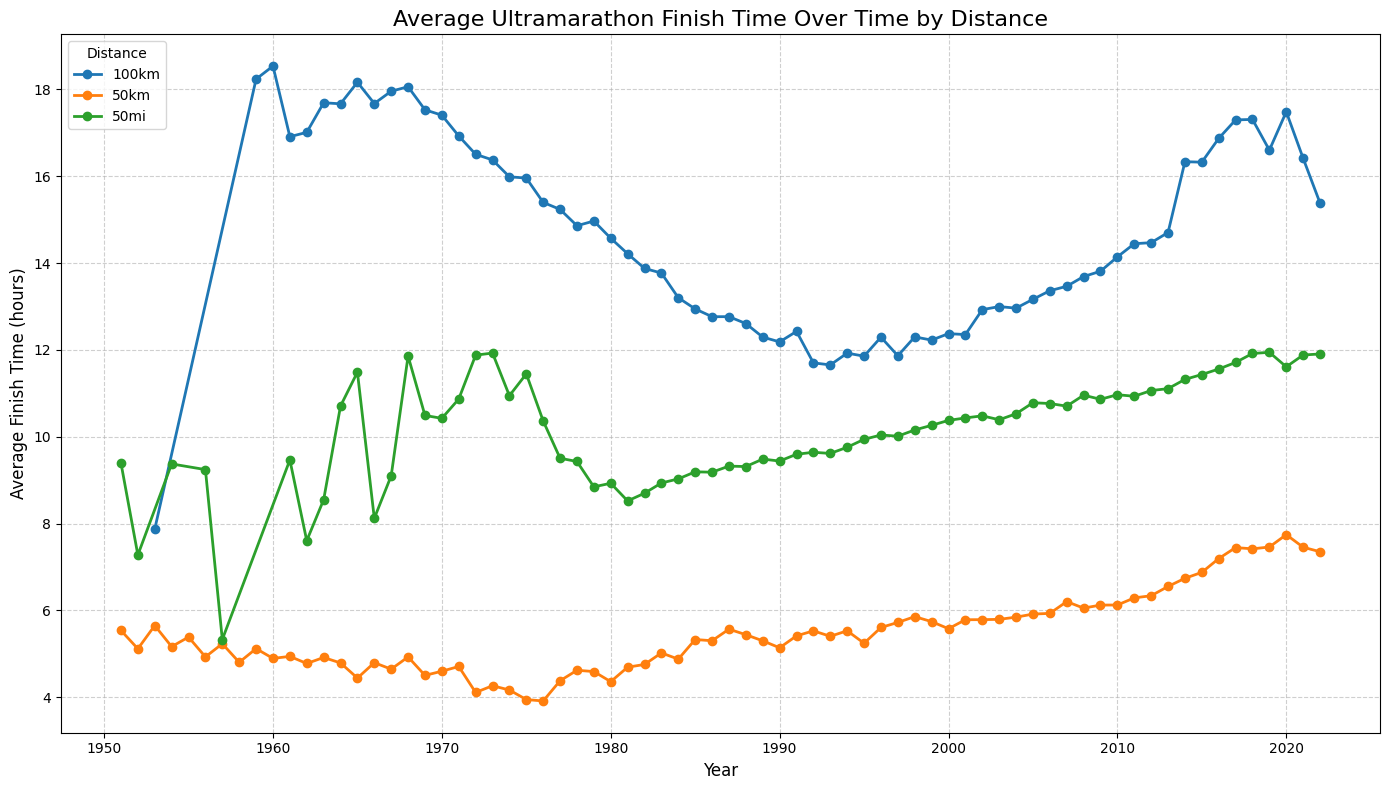

In [4]:
plot_performance_over_time_top_3_1950(df_top_3)

As we can see, there are not many consistent values prior to 1950. This is likely due to sparse data in the dataset. 
For our analysis, we will just look at data from 1950 onwards since this is the most consistent time window. 

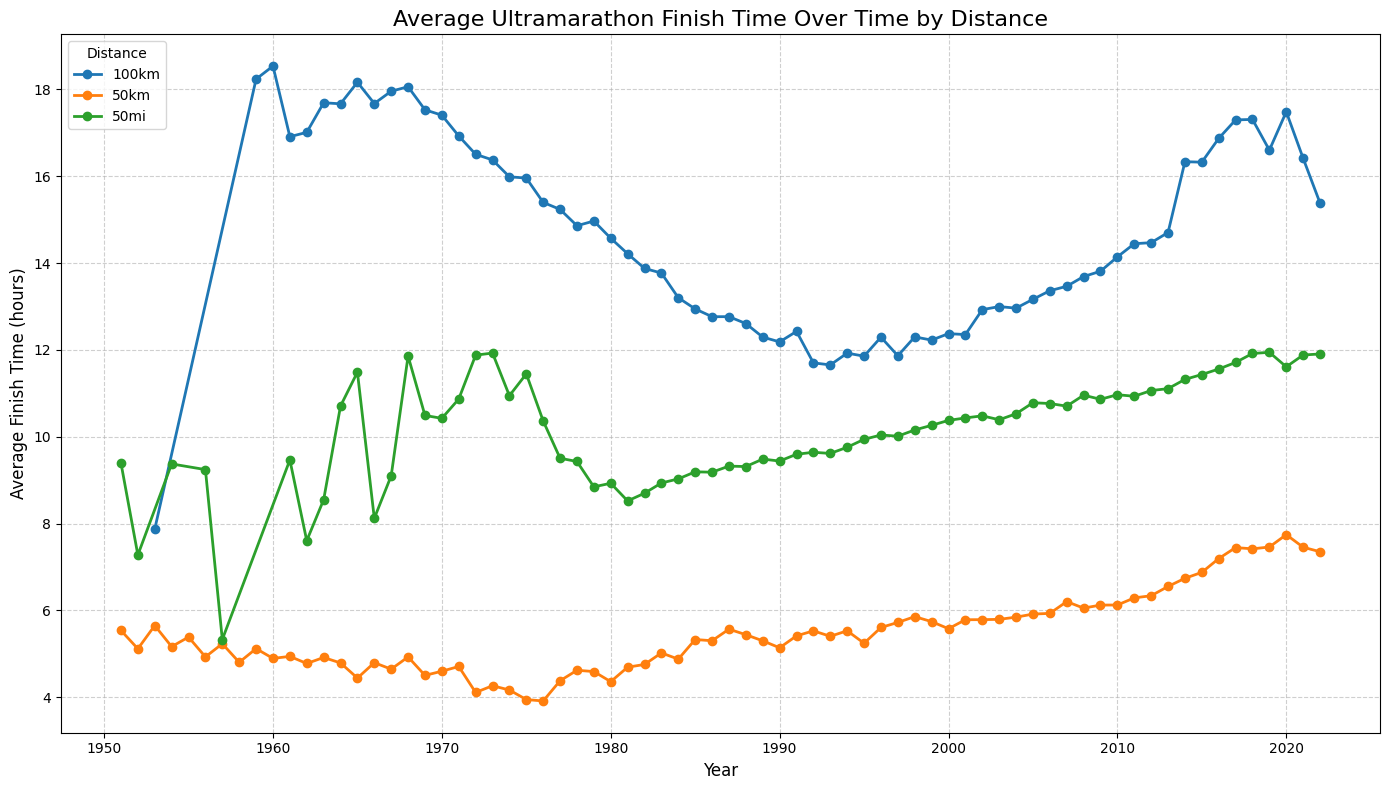

In [5]:
plot_performance_over_time_top_3_1950(df_top_3)

This chart tells a compelling story. For all three events, starting around 1950-1960 and up until around 1975-1990, we see a decrease in average finish time. This is because during this time period, ultrarunning was a niche sport specialized toward elite runners. There were a lot less races worldwide, and participation was limited to well-trained endurance runners. These runners were becoming highly skilled and setting faster times each year.

However, some time around the 1980s, we saw a massive boom in recreational running (especially after Frank Shorter's 1972 Olympic marathon win). This invited a large chunk of the general public including older runners, runners from more countries, and more "ordinary" athletes overall. As a result, we see a steady **increase** in average finish times from the 1980s to today.

However, with all this said, it is worthwhile to analyze the total number of finishers per year to show the rise in participation. We can also compare **variation** (standard deviation) of finish times over time to show a widening of the performance spectrum (not just elites). Finally, we can look at age and country diversity over time.

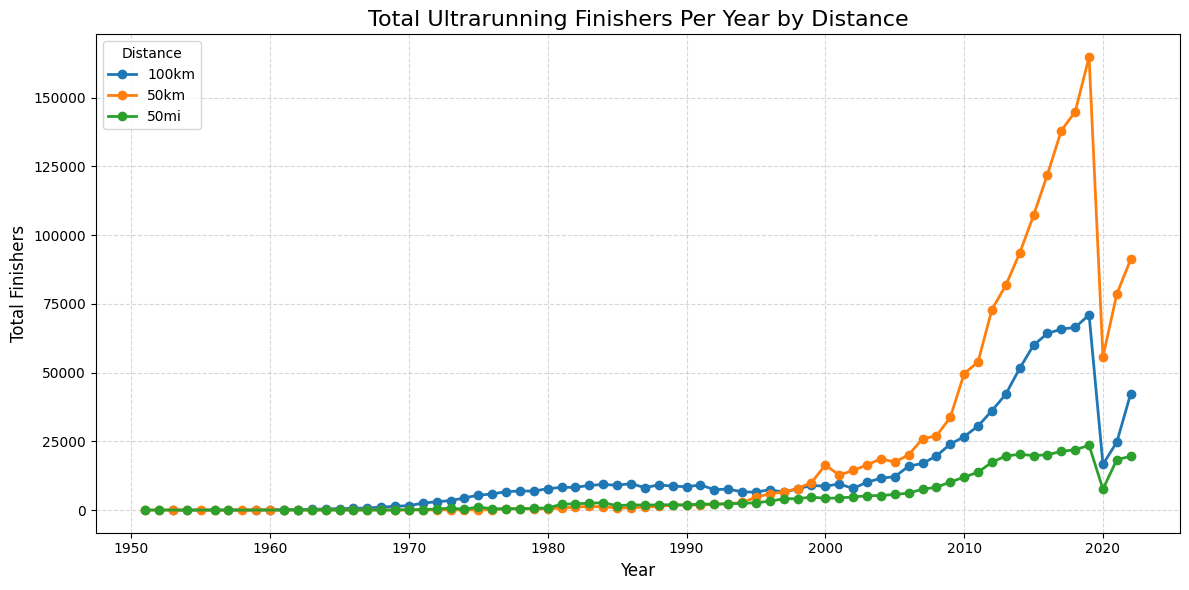

In [6]:
plot_finishers_per_year(df_top_3)

This plot has verified our claims that there was a massive participation increase starting around the 1970-1980s. Following this surge, we see an astronomical increase leading all the way up to 2020, which then faces a significant collapse due to the coronavirus pandemic. 

Next, by using a box plot, we will analyze variation (standard deviation) to further verify our claims. We will just look at the `50 km` event distance for this example. 

/Users/ethancooley/Programming/Duke/AIPI 510 Sourcing Data/Ultramarathon-Dataset-EDA/scripts/create_plots.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_3["Performance_hours"] = df_top_3["performance_sec"] / 3600


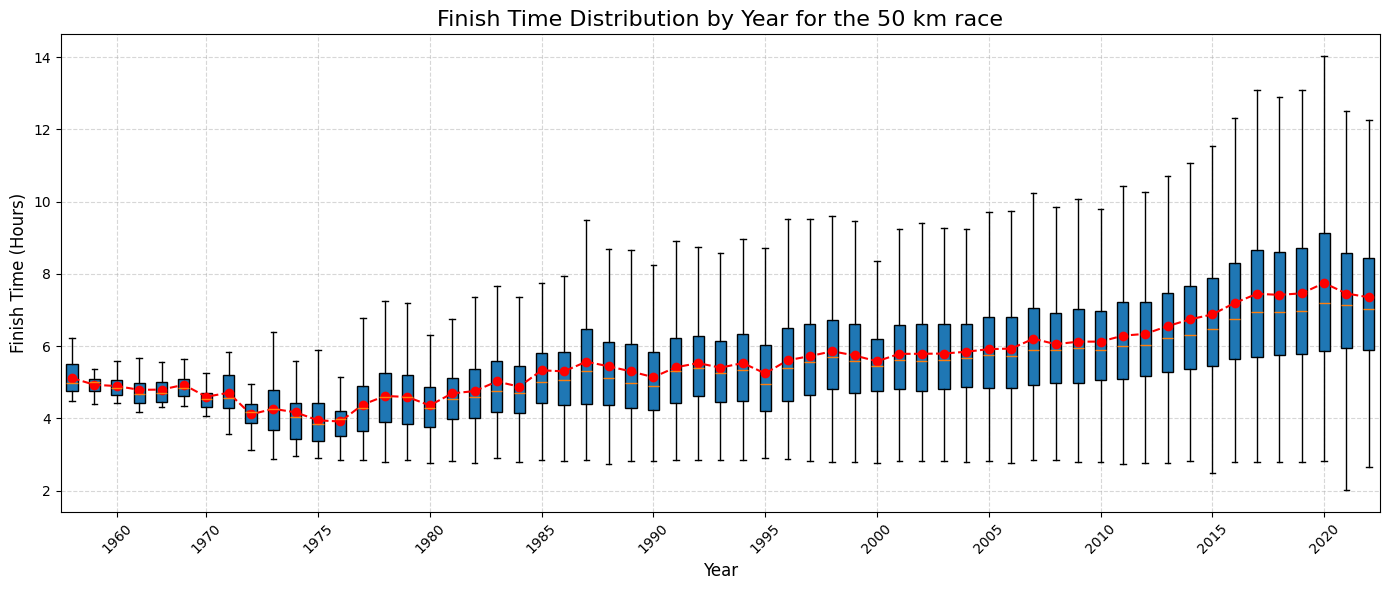

In [7]:
plot_time_distribution_by_year(df_top_3)

As we can see, there is a huge increase in the variation (standard deviation) of finish times for runners in the 50 km during this time window. This shows the event shifted from a niche space for elite runners to a more welcoming one for athletes of all levels.

Now, let's analyze how runner age has changed over time and what the distribution is. But first, we will need to engineer a new feature that is not in the original dataset. Since the dataset includes `Athlete year of birth` and `Year of Event`, we can create an `Age` column by calculating the difference between the two.

### Feature Engineering

In [6]:
# Calculate athlete age during the event (Year of event - Year of birth)
df_top_3["Age"] = df_top_3["Year of event"] - df_top_3["Athlete year of birth"]

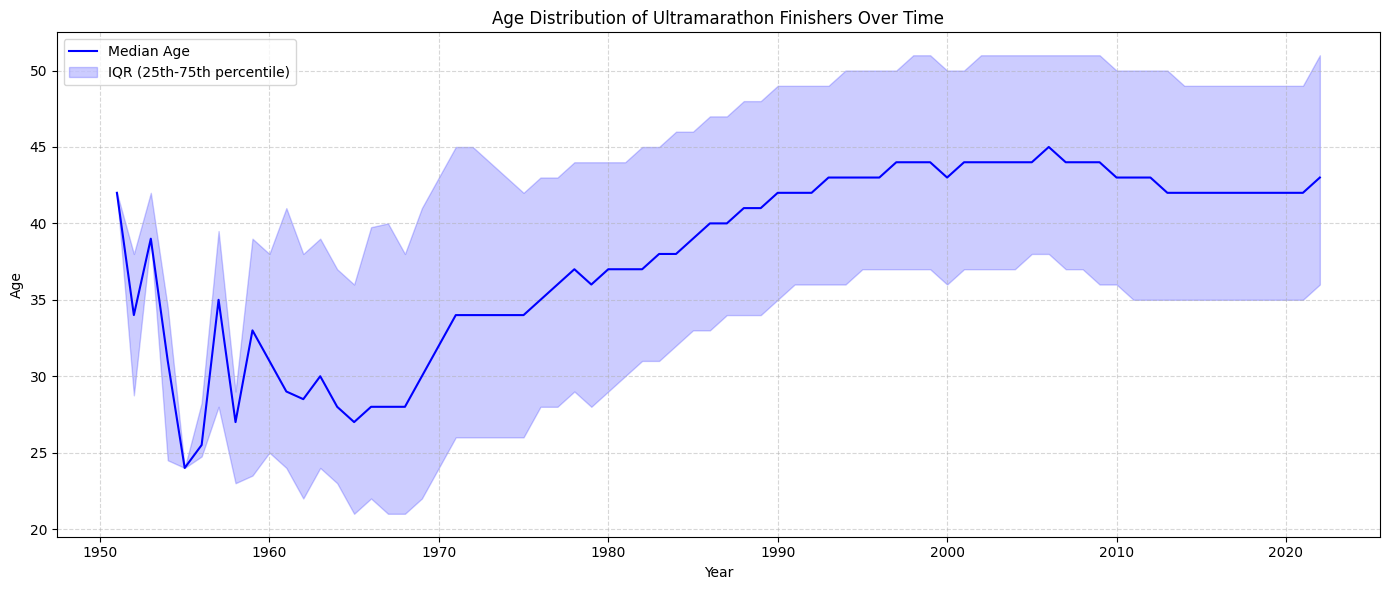

In [7]:
plot_age_distribution(df_top_3)

We see once again that as the years go on from around 1960, there is an influx of new runners (mostly older people). There is also a higher diversity of age groups, as indicated by the IQR shading. The influx of older runners contributes to the increase in average finishing times we have been seeing, and the increased diversity shows that more and more people are participating in the sport. 

Lastly, let's look at the total counts of countries that take part in ultrarunning during this time window.

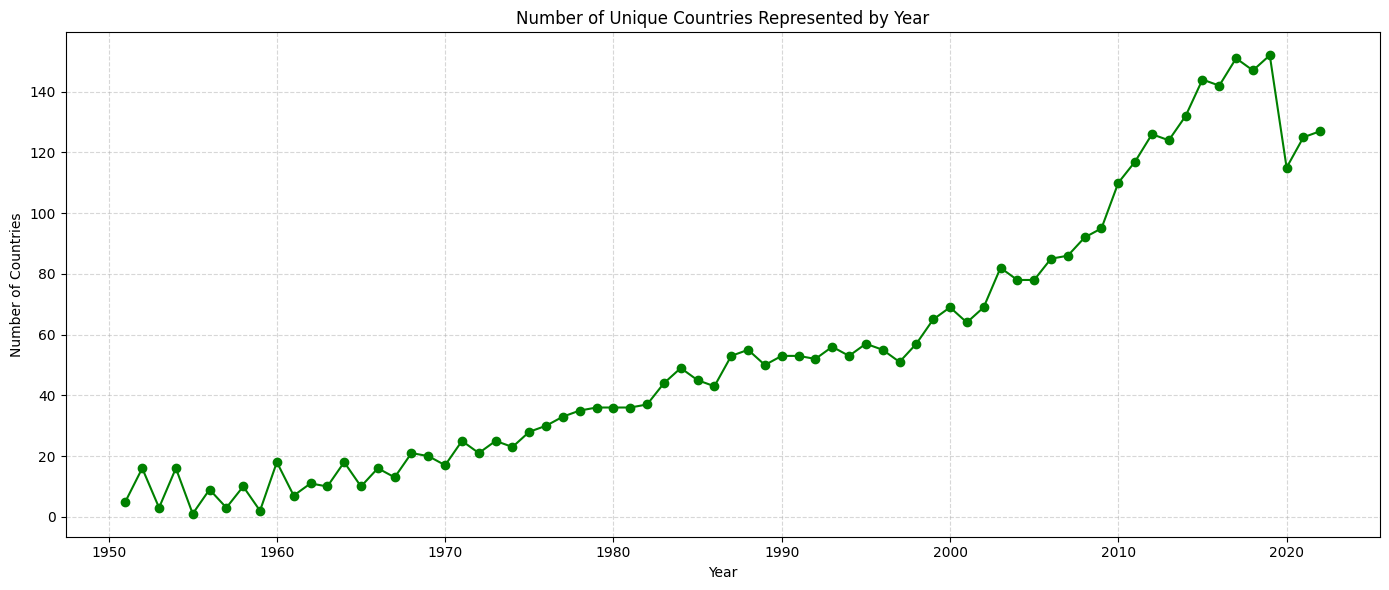

In [4]:
plot_country_counts_over_time(df_top_3)

As we can see, the number of participating countries goes from around 0-20 in the 1950s all the way up to around 140 in 2020. This once again proves the mass adoption of ultrarunning and explains the increase in average performance times, as more and more "ordinary" runners participate in the sport. 

## Discussion & Ethical Implications

**What does all this tell us?**

Since the 1950s, ultramarathon participation has become more diverse in age and nationality, showing that the sport is opening up to people beyond just elite runners. We have gone from fast finish times with few competitors to slower times but many more people achieving extraordinary goals. 

It begs the question, *"Is the sport better now that it’s slower but more inclusive, or worse because the focus on elite performance is diminished?"*

Ultimately, the rising finishs times are not a failure, but a human success story. They're proof that the sport now welcomes people of all kinds to push their limits. 